# 0. Lendo Arquivo

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFECV  # Recursive Feature Elimination with Cross-Validation
from sklearn.model_selection import StratifiedKFold  # Estratégia de validação cruzadas

In [3]:
df = pd.read_csv( 'radiomic_data.csv' )
df.shape

(2587, 116)

# 1. Pré-processamento da base de dados

## 1.1 Quantidade de Classes

In [4]:
# Quantas ocorrências de cada classe
contagens = df[ df.columns[ -1 ] ].value_counts()
print( contagens )

class
BENIGN                     1100
MALIGNANT                   918
BENIGN_WITHOUT_CALLBACK     569
Name: count, dtype: int64


### 1.1.1 Removendo a classe extra

Como na especificação foi comentado que existem duas classes, sendo elas BENIGN e MALIGNANT, é necessário remover as instâncias da classe BENIGN_WITHOUT_CALLBACK.

In [5]:
# Nome da coluna alvo
target_column_name = df.columns[ -1 ]

X = df.drop( columns = target_column_name )
y = df[ target_column_name ]

mask = y != 'BENIGN_WITHOUT_CALLBACK'
X_bin = X[ mask ]
y_bin = y[ mask ]

df = pd.concat( [ X_bin, y_bin ], axis = 1 )
df.shape

(2018, 116)

## 1.2 Valores Ausentes

### 1.2.1 Ver se há algum valor ausente no DataFrame

Retorna `True` se houver pelo menos um valor ausente.

In [6]:
df.isnull().values.any()

np.False_

### 1.2.2 Contar quantos valores ausentes há em cada coluna

In [7]:
df.isnull().sum()

diagnostics_Versions_PyRadiomics    0
diagnostics_Versions_Numpy          0
diagnostics_Versions_SimpleITK      0
diagnostics_Versions_PyWavelet      0
diagnostics_Versions_Python         0
                                   ..
original_ngtdm_Coarseness           0
original_ngtdm_Complexity           0
original_ngtdm_Contrast             0
original_ngtdm_Strength             0
class                               0
Length: 116, dtype: int64

### 1.2.3 Exibir linhas que possuem valores ausentes

In [8]:
df[ df.isnull().any( axis = 1 ) ]

,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,diagnostics_Image-original_Dimensionality,diagnostics_Image-original_Spacing,...,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,class


**Resultado: não há valores ausentes na base de dados.**

## 1.3 Valores Duplicados

### 1.3.1 Ver se há alguma linha duplicada

Retorna `True` se houver ao menos uma linha duplicada

In [9]:
df.duplicated().any()

np.False_

### 1.3.2 Contar o número de linhas duplicadas

In [10]:
df.duplicated().sum()

np.int64(0)

### 1.3.3 Ver quais são as linhas duplicadas

In [11]:
df[ df.duplicated() ]

,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,diagnostics_Image-original_Dimensionality,diagnostics_Image-original_Spacing,...,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,class


**Resultado: não há linhas duplicadas na base de dados.**

## 1.4 Redução de Dimensionalidade

### 1.4.1 Remover colunas manualmente

Algumas colunas na base de dados são sobre versões de bibliotecas, tamanho das imagens e algumas outras coisas.

In [12]:
columns_to_drop: list[ str ] = [ 'diagnostics_Versions_PyRadiomics', 'diagnostics_Versions_Numpy',
                                 'diagnostics_Versions_SimpleITK', 'diagnostics_Versions_PyWavelet',
                                 'diagnostics_Versions_Python', 'diagnostics_Configuration_Settings',
                                 'diagnostics_Configuration_EnabledImageTypes', 'diagnostics_Image-original_Hash',
                                 'diagnostics_Image-original_Dimensionality', 'diagnostics_Image-original_Spacing',
                                 'diagnostics_Image-original_Size', 'diagnostics_Image-original_Mean',
                                 'diagnostics_Mask-original_Hash', 'diagnostics_Mask-original_BoundingBox',
                                 'diagnostics_Mask-original_VoxelNum', 'diagnostics_Mask-original_VolumeNum',
                                 'diagnostics_Mask-original_CenterOfMassIndex',
                                 'diagnostics_Mask-original_CenterOfMass' ]

### 1.4.2 Colunas com valores únicos

Algumas colunas da base de dados são preenchidas com um único valor, o que não ajuda muito.

In [13]:
# Conta valores únicos em cada coluna
unique_counts = df.nunique()

# Seleciona nomes de colunas constantes
constant_columns = unique_counts[ unique_counts == 1 ].index.tolist()

# Unificando as listas de colunas que serão removidas
columns_to_drop.extend( constant_columns )

df = df.drop( columns = columns_to_drop )
df.shape

(2018, 93)

### 1.4.3 Análise de Correlação

Aqui será aplicada uma técnica de remoção de variáveis altamente correlacionadas entre si, baseada em análise de correlação entre features numéricas.

Ideia principal
- Se duas variáveis têm correlação muito alta (ex: > 0.9), elas transmitem praticamente a mesma informação.
- Manter ambas pode ser redundante e até prejudicial para o modelo.
- Eliminar uma das duas ajuda a simplificar o modelo sem perda significativa de desempenho.

In [14]:
# Separando as features (X) da variável alvo (y)
X = df.drop( columns = [ target_column_name ] )
y = df[ target_column_name ]

# Pegando as colunas numéricas de X
numeric_cols = X.select_dtypes( include = np.number ).columns.tolist()

In [37]:
# --- Dicionário para armazenar resultados X para comparação ---
datasets_X = { }
n_features = { }
datasets_X[ 'Baseline' ] = X_encoded.to_numpy()  # Adicionar baseline codificado
n_features[ 'Baseline' ] = X_encoded.shape[ 1 ]

In [15]:
# Calculando matriz de correlação
correlation_matrix = X[ numeric_cols ].corr()

# Plotando o resultado
# plt.figure( figsize = (8, 6) )
# sns.heatmap( correlation_matrix, cmap = 'coolwarm', annot = False )
# plt.title( 'Matriz de Correlação Feature-Feature' )
# plt.show()

# **TESTAR OUTRAS ESTRATÉGIAS**

In [16]:
# Limiar de correlação absoluta
correlation_threshold = 0.9

# Encontrar pares de features com correlação acima do limiar
# Usamos o triângulo superior da matriz para evitar pares duplicados (A,B) e (B,A)
# e correlação de uma feature com ela mesma (diagonal = 1)
upper_triangle = correlation_matrix.where( np.triu( np.ones( correlation_matrix.shape ), k = 1 ).astype( bool ) )

# Encontrar colunas a serem removidas
columns_to_drop = set()
for i in range( len( upper_triangle.columns ) ):
    for j in range( i ):
        if abs( upper_triangle.iloc[ j, i ] ) > correlation_threshold:
            colname_i = upper_triangle.columns[ i ]
            colname_j = upper_triangle.columns[ j ]

            # Estratégia: Remover a coluna 'i' (a segunda do par no loop)
            # Outras estratégias poderiam ser implementadas aqui (ex: remover a com menor variância,
            # ou a com menor correlação média com as demais, ou menor corr com o alvo se calculado)
            columns_to_drop.add( colname_i )

X_reduced_ff = X.drop( columns = list( columns_to_drop ) )

X_reduced_ff.shape

(2018, 25)

In [17]:
df_corr_ff = pd.concat( [ X_reduced_ff, y ], axis = 1 )
df_corr_ff.shape

(2018, 26)

In [38]:
# Armazenar para comparação
datasets_X[ 'Correlação F-F' ] = X_reduced_ff.to_numpy()
n_features[ 'Correlação F-F' ] = X_reduced_ff.shape[ 1 ]

### 1.4.4 Seleção Baseada em Informação Mútua (Mutual Information)

Aqui será utilizada uma técnica de seleção de variáveis baseada em informação mútua, que mede a dependência estatística entre cada variável e a variável alvo. O objetivo é identificar quais variáveis carregam mais informação relevante para prever o resultado.

Ideia principal
- Calcular a informação mútua (MI) entre cada variável preditora e a variável alvo.
- Selecionar automaticamente as K variáveis mais informativas com base nos maiores scores de MI.

In [18]:
#  Codificar alvo (y) para formato numérico
le = LabelEncoder()
y_encoded = le.fit_transform( y )

# Criar uma cópia de X para codificar, preservando o X original por enquanto
X_encoded = X.copy()

In [19]:
# Calculando Scores de Mutual Information
mi_scores = mutual_info_classif( X_encoded, y_encoded, discrete_features = 'auto', random_state = 42 )

# Criar uma Series para facilitar a visualização
mi_scores_series = pd.Series( mi_scores, index = X_encoded.columns ).sort_values( ascending = False )

# print("\nScores de Mutual Information calculados (maior para menor):")
# print(mi_scores_series)
#
# # Plotar os scores para visualização
# plt.figure(figsize=(10, max(6, len(X_encoded.columns) // 2))) # Ajusta altura
# mi_scores_series.plot(kind='barh', color='teal')
# plt.title('Scores de Mutual Information por Feature')
# plt.xlabel('Score MI')
# plt.ylabel('Feature')
# plt.gca().invert_yaxis() # Maior score no topo
# plt.tight_layout() # Ajusta o layout para não cortar labels
# plt.show()

In [20]:
# Selecionar as K Melhores Features
k_features_to_keep = 30

# Instanciar o seletor
# Passamos a função de score e o número K
selector = SelectKBest( score_func = mutual_info_classif, k = k_features_to_keep )

# Ajustar o seletor aos dados codificados (X_encoded, y_encoded)
selector.fit( X_encoded, y_encoded )

# Obter as features selecionadas (nomes das colunas)
selected_features_mask = selector.get_support()
selected_features_names = X_encoded.columns[ selected_features_mask ]

In [21]:
# Selecionar as colunas correspondentes do DataFrame (X) para preservar os tipos de dados originais
X_selected_mi = X[ selected_features_names ].copy()

# Combinar as features selecionadas (X_selected_mi) com a coluna alvo (y)
df_mi = pd.concat( [ X_selected_mi, y ], axis = 1 )
df_mi.shape

(2018, 31)

In [39]:
# Armazenar para comparação
datasets_X[ 'Mutual Info' ] = X_selected_mi.to_numpy()
n_features[ 'Mutual Info' ] = X_selected_mi.shape[ 1 ]

### 1.4.5 Seleção Baseada em Modelos de Árvore

Será treinado um modelo de floresta aleatória completo com todas as variáveis disponíveis. Após o treinamento, serão extraídas as importâncias atribuídas a cada variável. Em seguida, será aplicado um filtro automático que seleciona apenas as variáveis mais relevantes, com base em um critério quantitativo de corte.

Ideia principal
- Utilizar uma floresta de decisão com múltiplas árvores, que internamente avalia a utilidade de cada variável para separar os dados.
- Aproveitar a estimativa de desempenho fora da amostra (OOB) para obter uma noção de quão bem o modelo pode generalizar.
- Calcular a importância de cada variável com base em sua contribuição para reduzir a impureza nas árvores.
- Selecionar automaticamente apenas as variáveis cuja importância está acima de um limiar — neste caso, acima da mediana.

In [22]:
X_encoded = X.copy()

# n_estimators: número de árvores na floresta
# random_state: para reprodutibilidade
# n_jobs=-1: usar todos os processadores disponíveis (acelera)
# oob_score=True pode dar uma estimativa de desempenho
rf_model = RandomForestClassifier(
        n_estimators = 100,
        random_state = 42,
        n_jobs = -1,
        class_weight = 'balanced',
        oob_score = True
)

rf_model.fit( X_encoded, y_encoded )
print( f"Modelo treinado. OOB Score (estimativa de acurácia): {rf_model.oob_score_:.4f}" )

Modelo treinado. OOB Score (estimativa de acurácia): 0.6021


In [23]:
# Extrair as features importantes
importances = rf_model.feature_importances_
feature_importances = pd.Series( importances, index = X_encoded.columns ).sort_values( ascending = False )

# print( "\nImportância das Features segundo o Random Forest:" )
# print( feature_importances )

# Plotar as importâncias
# plt.figure( figsize = (10, max( 6, len( X_encoded.columns ) // 2 )) )
# feature_importances.plot( kind = 'barh', color = 'forestgreen' )
# plt.title( 'Importância das Features (Random Forest)' )
# plt.xlabel( 'Importância Média de Redução de Impureza' )
# plt.ylabel( 'Feature' )
# plt.gca().invert_yaxis()
# plt.tight_layout()
# plt.show()

In [24]:
# SelectFromModel seleciona features cuja importância é maior que um limiar.
# O limiar pode ser um valor numérico ou uma string como "mean" ou "median".
# Usar "median" pode ser mais robusto a outliers nos scores de importância.
threshold_value = "median"  # Ou 'mean', ou um float como 0.005

# Passamos o modelo JÁ TREINADO (rf_model) e prefit=True
# O threshold define o corte
selector_rf = SelectFromModel( rf_model, threshold = threshold_value, prefit = True )

# Aplicar o seletor aos dados codificados
# Apenas verifica quais colunas passam no threshold
mask_selected_rf = selector_rf.get_support()
selected_features_rf_names = X_encoded.columns[ mask_selected_rf ]

In [25]:
# Selecionar as colunas do dataframe para manter os tipos
X_selected_rf = X[ selected_features_rf_names ].copy()

# Combinar com a coluna alvo
df_rf = pd.concat( [ X_selected_rf, y ], axis = 1 )

df_rf.shape

(2018, 47)

In [40]:
# Armazenar para comparação
datasets_X[ 'RF Importance' ] = X_selected_rf.to_numpy()
n_features[ 'RF Importance' ] = X_selected_rf.shape[ 1 ]

### 1.4.6 Eliminação Recursiva de Atributos

Será aplicado um processo automático que, a cada rodada, elimina uma variável de entrada e avalia como isso afeta a capacidade do modelo de previsão. Ao final, identifica o conjunto de variáveis que oferece o melhor desempenho.

Ideia principal:
- Montar um classificador robusto (floresta de decisões) que já compensa desequilíbrios entre classes.
- Dividir os dados várias vezes (20 “rodadas”), mantendo a proporção de cada classe em cada divisão, para testar estabilidade.
- Em cada rodada, remover sistematicamente uma variável diferente e medir a performance.
- Repetir até atingir um número mínimo de variáveis.
- Escolher o ponto em que o modelo atingiu sua maior média de acurácia nas rodadas de teste.

In [26]:
# Aproveitando o modelo do Random Florest criando antes
estimator = rf_model

# Estratégia de Validação Cruzada
# StratifiedKFold mantém a proporção das classes em cada fold, bom para classificação.
cv_strategy = StratifiedKFold(
        n_splits = 20,  # Número de folds
        shuffle = True,  # Embaralhar os dados antes de dividir
        random_state = 42
)

# Métrica para avaliar o "time" em cada "jogo de teste"
# 'accuracy': Acurácia geral
# 'f1_weighted': Média F1 ponderada pelas classes
# 'roc_auc': Área sob a curva ROC (bom para classificação binária)
scoring_metric = 'accuracy'

# Número mínimo de features a manter (para não acabar com zero)
min_features = max( 1, min( 5, X_encoded.shape[ 1 ] // 2 ) )

# Instanciar o RFECV
rfecv_selector = RFECV(
        estimator = estimator,  # O modelo "técnico"
        step = 1,  # Remover 1 feature por vez
        cv = cv_strategy,  # A estratégia de validação cruzada
        scoring = scoring_metric,  # A métrica para avaliar o desempenho
        min_features_to_select = min_features,  # Número mínimo de features
        n_jobs = -1  # Usar todos os processadores para paralelizar a CV
)

rfecv_selector.fit( X_encoded, y_encoded )

RFECV(cv=StratifiedKFold(n_splits=20, random_state=42, shuffle=True),
      estimator=RandomForestClassifier(class_weight='balanced', n_jobs=-1,
                                       oob_score=True, random_state=42),
      min_features_to_select=5, n_jobs=-1, scoring='accuracy')

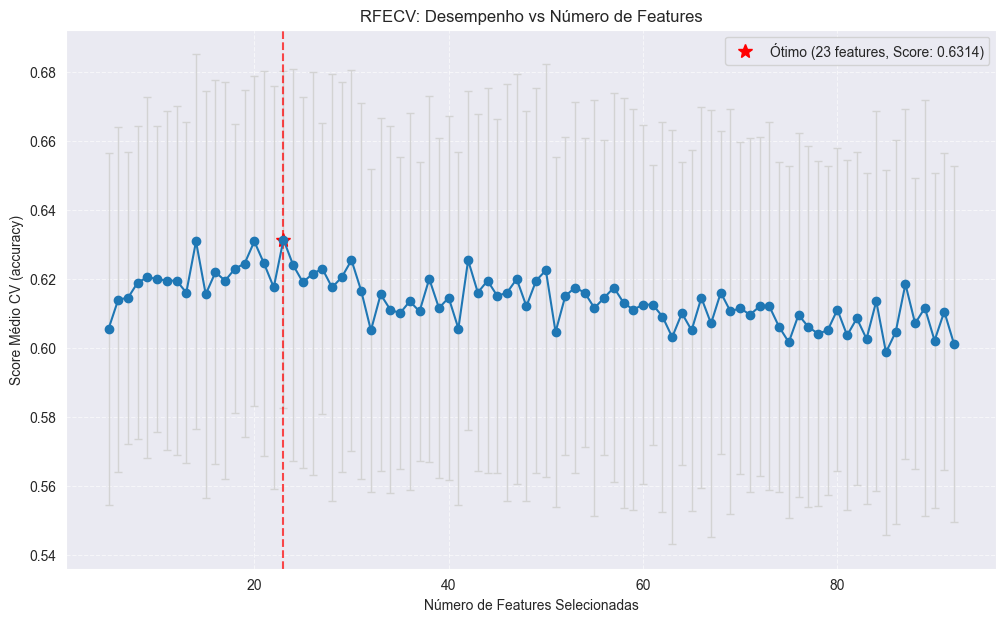

In [27]:
optimal_n_features = rfecv_selector.n_features_
selected_features_mask_rfe = rfecv_selector.support_  # Máscara booleana das features selecionadas
selected_features_rfe_names = X_encoded.columns[ selected_features_mask_rfe ]

# Visualizar o resultado da validação cruzada
# Isso mostra como o score da métrica variou conforme o número de features foi mudando
if hasattr( rfecv_selector, 'cv_results_' ):
    try:
        # Obter os scores médios e desvios padrão da validação cruzada
        mean_scores = rfecv_selector.cv_results_[ 'mean_test_score' ]
        std_scores = rfecv_selector.cv_results_[ 'std_test_score' ]
        # Número de features correspondente a cada score
        n_features_tested = range(
                rfecv_selector.min_features_to_select,
                len( mean_scores ) + rfecv_selector.min_features_to_select
        )

        plt.figure( figsize = (12, 7) )
        plt.xlabel( "Número de Features Selecionadas" )
        plt.ylabel( f"Score Médio CV ({scoring_metric})" )
        plt.errorbar(
                n_features_tested, mean_scores, yerr = std_scores, fmt = '-o', capsize = 3, ecolor = 'lightgray',
                elinewidth = 1
        )
        plt.title( "RFECV: Desempenho vs Número de Features" )

        # Marcar o ponto ótimo
        optimal_idx = optimal_n_features - rfecv_selector.min_features_to_select
        if 0 <= optimal_idx < len( mean_scores ):
            plt.plot(
                    optimal_n_features, mean_scores[ optimal_idx ], 'r*', markersize = 10,
                    label = f'Ótimo ({optimal_n_features} features, Score: {mean_scores[ optimal_idx ]:.4f})'
            )
            plt.axvline( x = optimal_n_features, color = 'red', linestyle = '--', alpha = 0.7 )
        else:
            print(
                    f"Aviso: Índice ótimo ({optimal_idx}) fora do range dos scores. Não foi possível marcar o ponto ótimo no gráfico."
            )

        plt.legend( loc = 'best' )
        plt.grid( True, linestyle = '--', alpha = 0.6 )
        plt.show()

    except KeyError as e:
        print(
                f"Erro ao acessar 'cv_results_' para plotagem (KeyError: {e}). Verifique a versão do scikit-learn ou os resultados do RFECV."
        )
    except Exception as e:
        print( f"Ocorreu um erro inesperado ao gerar o gráfico de CV: {e}" )
else:
    print( "Atributo 'cv_results_' não encontrado no seletor RFECV. Não é possível gerar o gráfico." )


In [28]:
# Selecionar as colunas do dataframe
X_selected_rfe = X[ selected_features_rfe_names ].copy()

# Combinar com a coluna alvo
df_rfe = pd.concat( [ X_selected_rfe, y ], axis = 1 )

df_rfe.shape

(2018, 24)

In [41]:
# Armazenar para comparação
datasets_X[ 'RFE' ] = X_selected_rfe.to_numpy()
n_features[ 'RFE' ] = X_selected_rfe.shape[ 1 ]

### 1.4.7 Análise de Componentes Principais (PCA)

Será aplicada uma técnica que transforma as variáveis originais em um novo conjunto de variáveis não correlacionadas — os componentes principais — que retêm o máximo possível da variabilidade dos dados originais. O número de componentes será definido automaticamente com base em um critério de variância explicada.

Ideia principal
- Reduzir a dimensionalidade do conjunto de dados mantendo o máximo de informação possível.
- Aplicar pré-processamento apropriado para garantir que todas as variáveis tenham contribuição balanceada.
- Calcular todos os componentes principais inicialmente, apenas para analisar a variância explicada.
- Selecionar automaticamente o número de componentes com base em um critério de variância explicada.
- Obter um novo conjunto de variáveis transformadas (componentes principais) para uso posterior.

In [29]:
from sklearn.preprocessing import StandardScaler  # Apenas StandardScaler é necessário para X
from sklearn.decomposition import PCA

# Escalonar todas as features em X
scaler = StandardScaler()
X_scaled = scaler.fit_transform( X )  # Aplica o escalonamento a todas as colunas de X

# Note que PCA funciona diretamente com o array NumPy X_scaled
X_scaled_df = pd.DataFrame( X_scaled, index = X.index, columns = X.columns )

# 2. Instanciar e ajustar o PCA inicialmente sem definir n_components
#    Isso calcula todos os componentes possíveis e sua variância explicada.
#    Usamos X_scaled (o array NumPy) que é o resultado do scaler.
pca_full = PCA( random_state = 42 )
pca_full.fit( X_scaled )

PCA(random_state=42)


Número total de componentes principais possíveis: 92
Número de componentes para explicar >= 95% da variância: 11


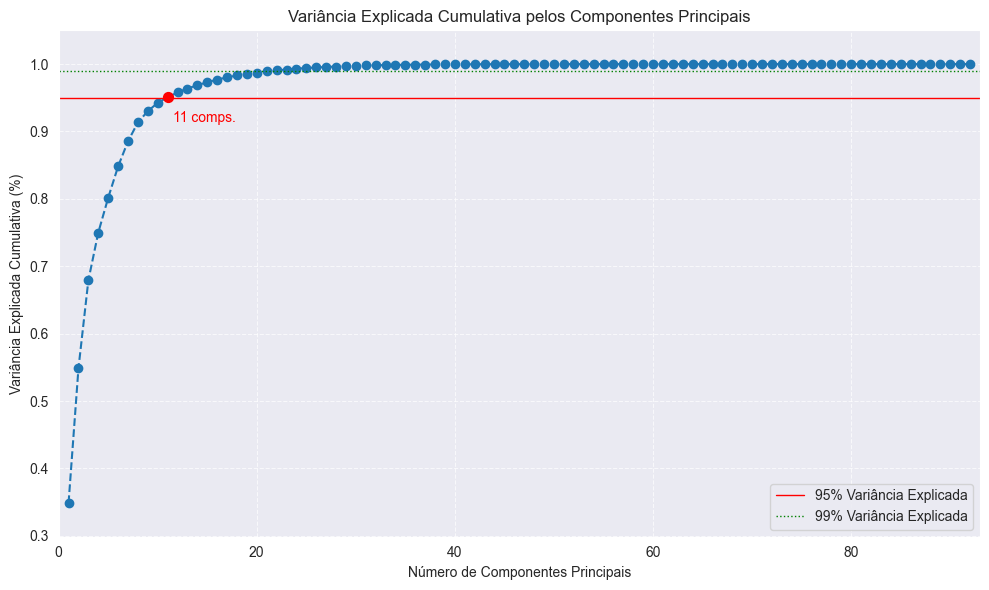

In [30]:
# 3. Analisar a Variância Explicada
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_explained_variance = np.cumsum( explained_variance_ratio )

print( f"\nNúmero total de componentes principais possíveis: {len( explained_variance_ratio )}" )

# Plotar a variância explicada cumulativa (Scree Plot)
plt.figure( figsize = (10, 6) )
plt.plot(
        range( 1, len( cumulative_explained_variance ) + 1 ), cumulative_explained_variance, marker = 'o',
        linestyle = '--'
)
plt.title( 'Variância Explicada Cumulativa pelos Componentes Principais' )
plt.xlabel( 'Número de Componentes Principais' )
plt.ylabel( 'Variância Explicada Cumulativa (%)' )
plt.grid( True, linestyle = '--', alpha = 0.7 )

# Adicionar linhas de referência (ex: 95% e 99% da variância)
plt.axhline( y = 0.95, color = 'r', linestyle = '-', linewidth = 1, label = '95% Variância Explicada' )
plt.axhline( y = 0.99, color = 'g', linestyle = ':', linewidth = 1, label = '99% Variância Explicada' )

# Adicionar anotação para o número de componentes em 95%
try:
    n_components_95 = np.argmax( cumulative_explained_variance >= 0.95 ) + 1
    # Verifica se n_components_95 está dentro dos limites do eixo X antes de plotar o texto/ponto
    if n_components_95 <= len( cumulative_explained_variance ):
        plt.text(
                n_components_95 + 0.5, cumulative_explained_variance[ n_components_95 - 1 ] - 0.02,
                f'{n_components_95} comps.', color = 'red', ha = 'left', va = 'top'
        )
        plt.scatter(
                n_components_95, cumulative_explained_variance[ n_components_95 - 1 ], c = 'red', s = 50,
                zorder = 5
        )  # Marca o ponto
        print( f"Número de componentes para explicar >= 95% da variância: {n_components_95}" )
    else:
        print( "Threshold de 95% não alcançado ou alcançado apenas com todos os componentes." )
except IndexError:
    print( "Não foi possível calcular n_components para 95%." )

plt.ylim( min( cumulative_explained_variance ) - 0.05, 1.05 )  # Ajuste o limite inferior do eixo Y dinamicamente
plt.xlim( 0, len( cumulative_explained_variance ) + 1 )  # Limite do eixo X
plt.legend( loc = 'best' )
plt.tight_layout()
plt.show()


In [31]:
# Escolher o número de componentes (n_components)
variance_threshold = 0.95
n_components_chosen = np.argmax( cumulative_explained_variance >= variance_threshold ) + 1

# Certifique-se que n_components_chosen não seja 0 se o primeiro componente já atingir o limiar
if n_components_chosen == 0 and cumulative_explained_variance[ 0 ] >= variance_threshold:
    n_components_chosen = 1
# Ou escolha um número fixo se preferir: n_components_chosen = 30

# 5. Aplicar PCA com o número de componentes escolhido
pca_final = PCA( n_components = n_components_chosen, random_state = 42 )
# Usa X_scaled (dados escalados) para o fit_transform final
X_pca = pca_final.fit_transform( X_scaled )

In [32]:
# Criar o DataFrame final com os Componentes Principais
pc_columns = [ f'PC{i + 1}' for i in range( n_components_chosen ) ]
X_pca_df = pd.DataFrame( X_pca, index = X.index, columns = pc_columns )

# Combinar os componentes principais com a variável alvo y
df_pca = pd.concat( [ X_pca_df, y.reset_index( drop = True ) ], axis = 1 )

df_pca.shape

(2587, 12)

In [42]:
# Armazenar resultado (já é NumPy array numérico)
datasets_X[ 'PCA' ] = X_pca
n_features[ 'PCA' ] = X_pca.shape[ 1 ]

### 1.4.8 Análise Discriminante Linear (LDA)

Será aplicada a técnica de Análise Discriminante Linear sobre os dados escalados. O objetivo principal é encontrar um novo espaço de menor dimensão no qual as classes sejam mais facilmente separáveis. Isso é feito projetando os dados sobre eixos que maximizam a separação entre as classes com base em variância entre e dentro das classes.

Ideia principal
- A LDA encontra combinações lineares das variáveis que melhor separam as classes.
- O número máximo de componentes possíveis é limitado pelo número de classes (n_classes - 1) e pelo número de variáveis (n_features).
- Após a transformação, cada componente discriminante representa um eixo que maximiza a razão entre variância entre classes e variância intra-classe.
- Também é possível visualizar a variância explicada por cada componente, o que ajuda a entender a contribuição de cada eixo para a separação das classes.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # Import LDA

y_1d = y

n_classes = y_1d.nunique()
n_features = X_scaled.shape[ 1 ]
print( f"Número de classes únicas em y: {n_classes}" )

# --- Aplicação do LDA ---

# 1. Determinar o número de componentes para LDA
#    O máximo é min(n_features, n_classes - 1)
max_lda_components = min( n_features, n_classes - 1 )

# Geralmente, usamos todos os componentes possíveis do LDA,
# pois cada um maximiza a separabilidade de forma ordenada.
n_components_lda = max_lda_components

# 2. Instanciar e ajustar o LDA
#    Passamos n_components (calculado acima).
#    O método fit() do LDA usa tanto X quanto y.
lda = LinearDiscriminantAnalysis( n_components = n_components_lda )

# Ajustar e transformar os dados escalados (X_scaled) usando y_1d
X_lda = lda.fit_transform( X_scaled, y_1d )

print( f"\nShape dos dados após LDA ({n_components_lda} componentes): {X_lda.shape}" )

# 3. Verificar a variância explicada (opcional, mas informativo)
#    Para LDA, isso representa a razão da variância entre classes explicada por cada componente.
try:
    explained_variance_ratio_lda = lda.explained_variance_ratio_
    print( f"Razão da variância (entre classes) explicada pelos componentes LDA: {explained_variance_ratio_lda}" )
    print( f"Razão da variância cumulativa: {np.cumsum( explained_variance_ratio_lda )}" )

    # Plot opcional da variância explicada pelo LDA
    plt.figure( figsize = (8, 5) )
    plt.bar(
            range( 1, n_components_lda + 1 ), explained_variance_ratio_lda, alpha = 0.7, align = 'center',
            label = 'Variância Individual'
    )
    plt.step(
            range( 1, n_components_lda + 1 ), np.cumsum( explained_variance_ratio_lda ), where = 'mid',
            label = 'Variância Cumulativa'
    )
    plt.ylabel( 'Razão da Variância Explicada' )
    plt.xlabel( 'Componente Discriminante Linear' )
    plt.title( 'Variância Explicada pelos Componentes LDA' )
    plt.xticks( range( 1, n_components_lda + 1 ) )
    plt.legend( loc = 'best' )
    plt.grid( True, axis = 'y', linestyle = '--', alpha = 0.7 )
    plt.tight_layout()
    plt.show()

except AttributeError:
    print( "\nNão foi possível obter a variância explicada (pode não estar disponível)." )

# 4. Criar o DataFrame final com os Componentes Discriminantes Lineares
ld_columns = [ f'LD{i + 1}' for i in range( n_components_lda ) ]
X_lda_df = pd.DataFrame( X_lda, index = X.index, columns = ld_columns )  # Mantém o índice original de X

# Combinar os componentes LDA com a variável alvo y
# Usar reset_index(drop=True) em y garante o alinhamento dos índices
df_lda = pd.concat( [ X_lda_df, y_1d.reset_index( drop = True ) ], axis = 1 )

df_lda.shape

In [43]:
# Armazenar resultado
datasets_X[ 'LDA' ] = X_lda
n_features[ 'LDA' ] = X_lda.shape[ 1 ]

## 1.5 Impacto na Dimensionalidade


--- 2. Avaliação Comparativa ---

Iniciando avaliação comparativa dos modelos com validação cruzada...

Avaliando Dataset: 'Baseline' (92 features)
  - Modelo: Logistic Regression
    * accuracy: 0.6115 +/- 0.0205 (Tempo: 2.62s)
    * f1_weighted: 0.6121 +/- 0.0204 (Tempo: 0.96s)
    * roc_auc: 0.6475 +/- 0.0206 (Tempo: 0.84s)
  - Modelo: Random Forest
    * accuracy: 0.5976 +/- 0.0175 (Tempo: 2.00s)
    * f1_weighted: 0.5925 +/- 0.0175 (Tempo: 1.68s)
    * roc_auc: 0.6355 +/- 0.0154 (Tempo: 1.58s)
  - Modelo: SVC
    * accuracy: 0.5897 +/- 0.0142 (Tempo: 2.17s)
    * f1_weighted: 0.5902 +/- 0.0139 (Tempo: 2.13s)
    * roc_auc: 0.6359 +/- 0.0302 (Tempo: 2.11s)
  - Modelo: Decision Tree
    * accuracy: 0.5535 +/- 0.0113 (Tempo: 0.33s)
    * f1_weighted: 0.5528 +/- 0.0106 (Tempo: 0.33s)
    * roc_auc: 0.5491 +/- 0.0107 (Tempo: 0.33s)
  - Modelo: MLP
    * accuracy: 0.6110 +/- 0.0239 (Tempo: 0.30s)
    * f1_weighted: 0.6045 +/- 0.0279 (Tempo: 0.28s)
    * roc_auc: 0.6362 +/- 0.0235 (Temp

/var/folders/rt/p4j2n9w169v5jq_zvl752pyh0000gn/T/ipykernel_1675/349346148.py:214: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels( xtick_labels, rotation = 45, ha = 'right' )


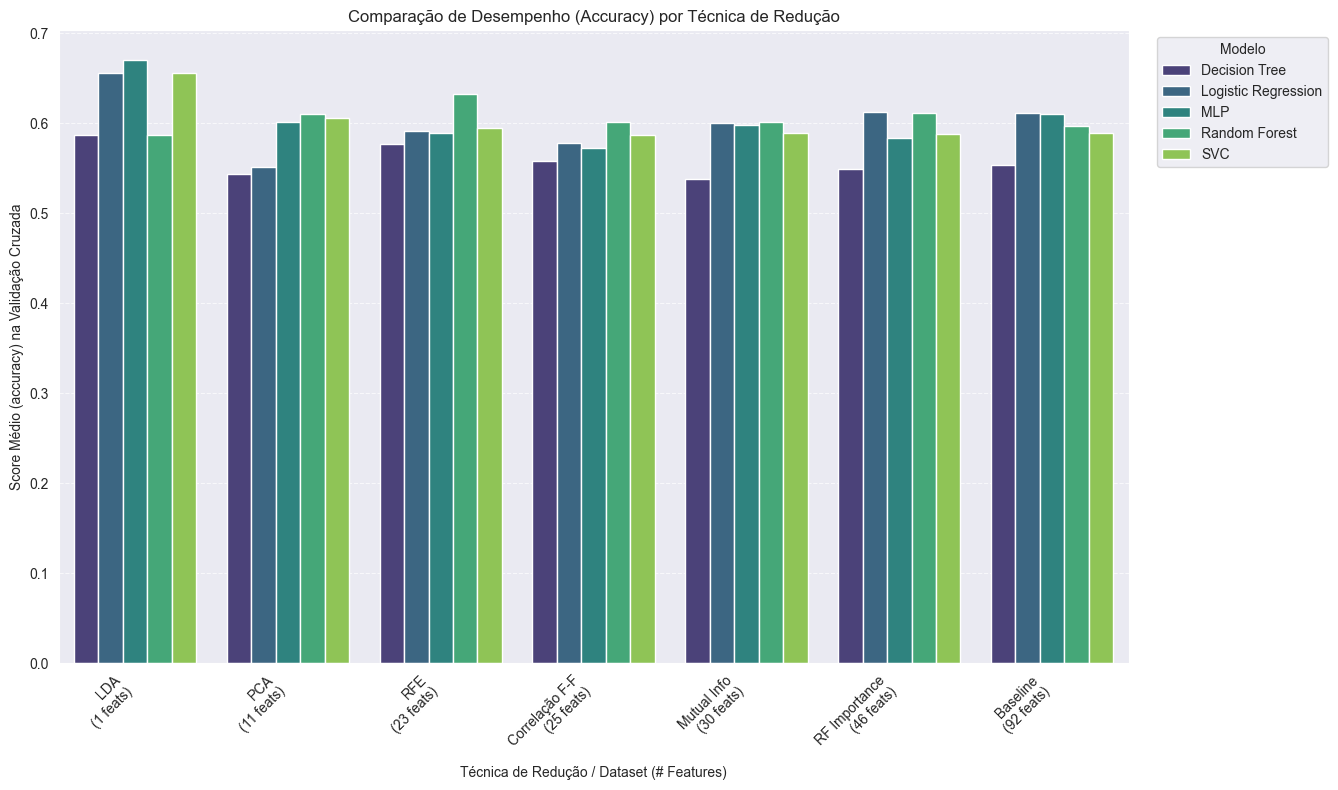

/var/folders/rt/p4j2n9w169v5jq_zvl752pyh0000gn/T/ipykernel_1675/349346148.py:214: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels( xtick_labels, rotation = 45, ha = 'right' )


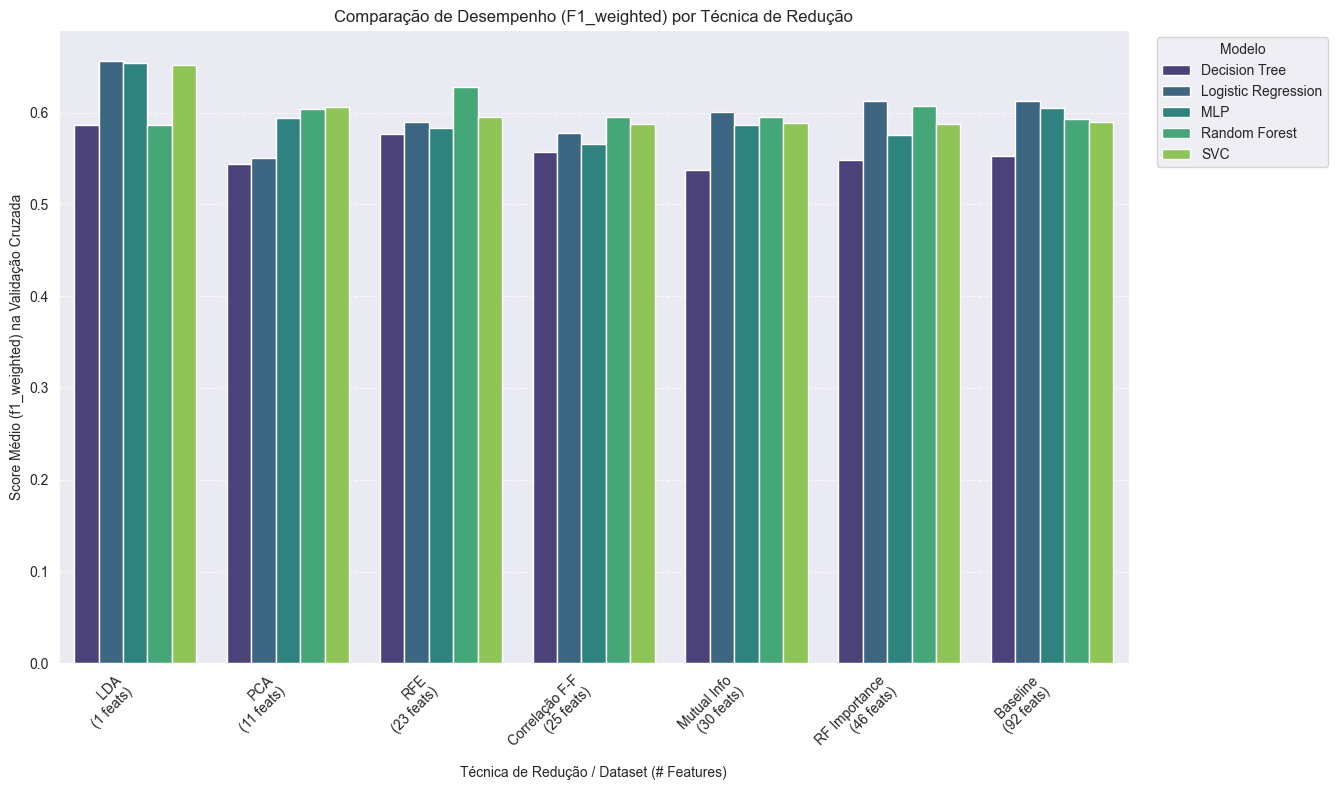

/var/folders/rt/p4j2n9w169v5jq_zvl752pyh0000gn/T/ipykernel_1675/349346148.py:214: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels( xtick_labels, rotation = 45, ha = 'right' )


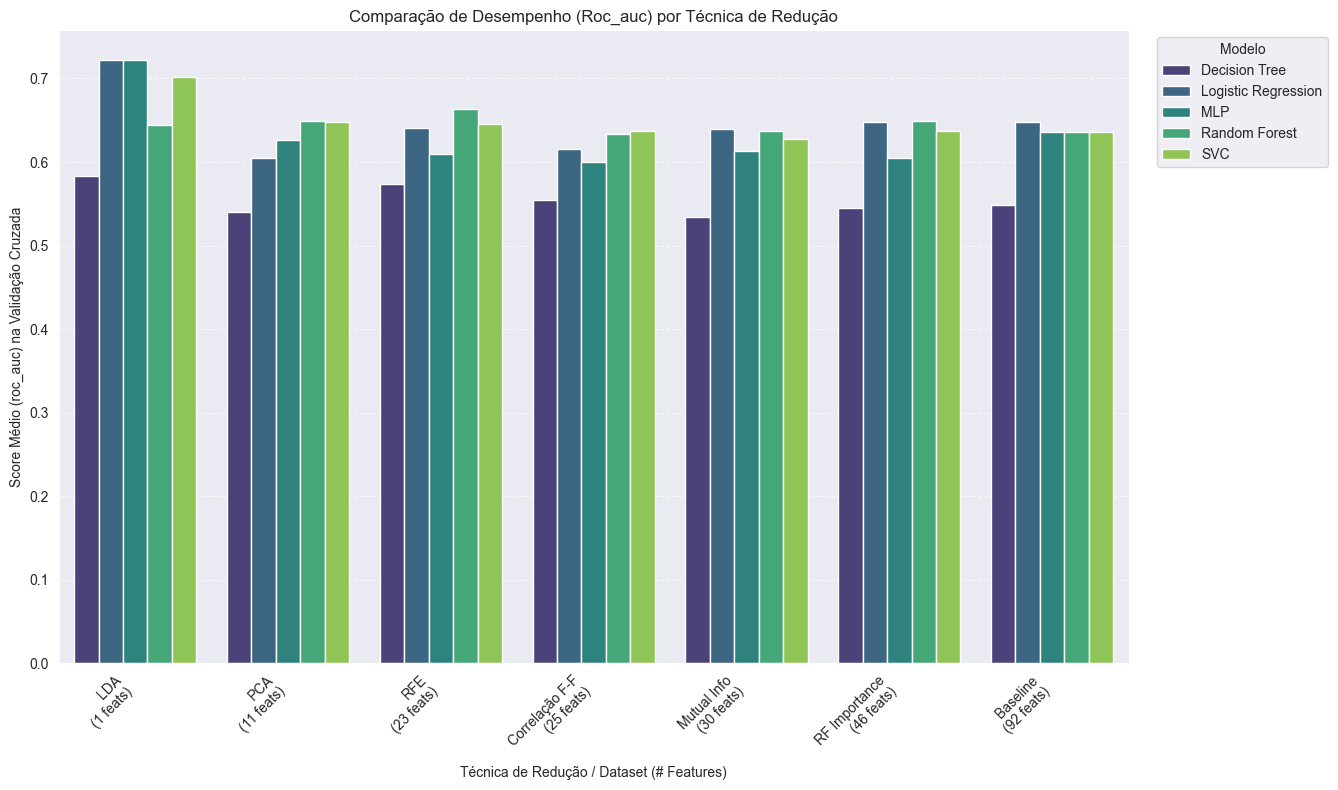

In [46]:
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import time

# # 2. Avaliação Comparativa do Impacto da Redução de Dimensionalidade

print( "\n--- 2. Avaliação Comparativa ---" )

# --- Modelos e Pipelines (Já definidos na seção anterior, reutilizar ou redefinir) ---
# Usaremos pipelines para incluir escalonamento onde for necessário/benéfico
models_eval = {
    "Logistic Regression": Pipeline(
            [
                ('scaler', StandardScaler()),  # Escalonar sempre dentro do pipeline para CV
                ('clf', LogisticRegression(
                        random_state = 42, max_iter = 1000, solver = 'liblinear', class_weight = 'balanced' ))
                # Adicionado class_weight
            ] ),
    "Random Forest": Pipeline(
            [
                # ('scaler', StandardScaler()), # RF geralmente não precisa, mas pode incluir se quiser padronizar
                ('clf', RandomForestClassifier(
                        random_state = 42, n_estimators = 100, class_weight = 'balanced', n_jobs = -1 ))
                # Adicionado class_weight
            ] ),
    "SVC": Pipeline(
            [
                ('scaler', StandardScaler()),
                ('clf', SVC( random_state = 42, probability = True, class_weight = 'balanced' ))
                # Adicionado class_weight
            ] ),
    "Decision Tree": Pipeline(
            [
                # ('scaler', StandardScaler()), # Opcional para Decision Tree simples
                ('clf', DecisionTreeClassifier( random_state = 42, class_weight = 'balanced' ))
            ] ),
    "MLP": Pipeline(
            [
                ('scaler', StandardScaler()),  # Importante para MLP
                ('clf',
                 MLPClassifier( random_state = 42, max_iter = 500, hidden_layer_sizes = (100,), early_stopping = True ))
                # Configuração básica
            ] )
}

# --- Estratégia de Avaliação ---
cv_strategy_eval = StratifiedKFold( n_splits = 5, shuffle = True, random_state = 42 )  # 5 folds é um bom padrão
scoring_metrics_eval = [ 'accuracy', 'f1_weighted', 'roc_auc' ]  # Métricas relevantes

# --- Loop de Avaliação ---
results_eval = [ ]  # Lista para armazenar os resultados

print( "\nIniciando avaliação comparativa dos modelos com validação cruzada..." )

# Usar y_final_encoded que já está pronto
y_target_eval = y_encoded

for data_name, X_data in datasets_X.items():
    current_n_features = n_features[ data_name ]
    print( f"\nAvaliando Dataset: '{data_name}' ({current_n_features} features)" )

    # Verificações básicas nos dados
    if X_data.shape[ 0 ] != len( y_target_eval ):
        print(
                f"ERRO CRÍTICO: Disparidade no número de amostras! X_{data_name} tem {X_data.shape[ 0 ]}, y tem {len( y_target_eval )}. Pulando." )
        continue
    if np.isnan( X_data ).any():
        print(
                f"AVISO CRÍTICO: NaNs encontrados em X_{data_name} ANTES da CV. Preenchendo com 0 para tentar continuar, mas VERIFIQUE O PRÉ-PROCESSAMENTO." )
        # Estratégia de preenchimento simples para evitar falha total, mas idealmente isso não deveria acontecer aqui.
        X_data = np.nan_to_num( X_data, nan = 0.0, posinf = 0.0, neginf = 0.0 )

    for model_name, pipeline in models_eval.items():
        print( f"  - Modelo: {model_name}" )
        # Executar validação cruzada para cada métrica
        for metric in scoring_metrics_eval:
            start_time_cv = time.time()
            try:
                # Verificar se X_data é adequado (ex: LDA pode ter poucas features para alguns modelos)
                if X_data.shape[ 1 ] == 0:
                    print( f"    * {metric}: ERRO - Dataset '{data_name}' não possui features. Pulando." )
                    score_mean, score_std = np.nan, np.nan  # Marcar como NaN
                elif metric == 'roc_auc' and len( np.unique( y_target_eval ) ) > 2:
                    # ROC AUC multiclasse precisa de ajustes ou pode não ser padrão no cross_val_score dependendo da versão
                    # Tentar com OvR (One-vs-Rest) se disponível ou pular
                    try:
                        scores = cross_val_score(
                                pipeline, X_data, y_target_eval, cv = cv_strategy_eval,
                                scoring = 'roc_auc_ovr_weighted',
                                n_jobs = -1 )
                        score_mean = np.mean( scores )
                        score_std = np.std( scores )
                    except ValueError:
                        print(
                                f"    * {metric} (multiclass): Não foi possível calcular 'roc_auc_ovr_weighted'. Pulando métrica." )
                        score_mean, score_std = np.nan, np.nan
                else:
                    scores = cross_val_score(
                            pipeline, X_data, y_target_eval, cv = cv_strategy_eval, scoring = metric, n_jobs = -1 )
                    score_mean = np.mean( scores )
                    score_std = np.std( scores )

                end_time_cv = time.time()

                # Armazenar resultado apenas se o cálculo foi bem-sucedido
                if pd.notna( score_mean ):
                    results_eval.append(
                            {
                                'Dataset': data_name,
                                'Num Features': current_n_features,
                                'Model': model_name,
                                'Metric': metric,
                                'Mean Score': score_mean,
                                'Std Score': score_std,
                                'CV Time (s)': end_time_cv - start_time_cv
                            } )
                    print(
                            f"    * {metric}: {score_mean:.4f} +/- {score_std:.4f} (Tempo: {end_time_cv - start_time_cv:.2f}s)" )
                else:
                    # Registrar que não foi possível calcular
                    results_eval.append(
                            {
                                'Dataset': data_name,
                                'Num Features': current_n_features,
                                'Model': model_name,
                                'Metric': metric,
                                'Mean Score': np.nan,
                                'Std Score': np.nan,
                                'CV Time (s)': end_time_cv - start_time_cv
                            } )


            except ValueError as ve:
                print(
                        f"    ERRO de ValueError durante CV para {model_name} com métrica {metric} (verifique dados/parâmetros): {ve}" )
                # Registrar falha
                results_eval.append(
                        { 'Dataset': data_name, 'Num Features': current_n_features, 'Model': model_name,
                          'Metric': metric, 'Mean Score': np.nan, 'Std Score': np.nan,
                          'CV Time (s)': time.time() - start_time_cv } )
            except Exception as e:
                print( f"    ERRO inesperado durante CV para {model_name} com métrica {metric}: {e}" )
                # Registrar falha
                results_eval.append(
                        { 'Dataset': data_name, 'Num Features': current_n_features, 'Model': model_name,
                          'Metric': metric, 'Mean Score': np.nan, 'Std Score': np.nan,
                          'CV Time (s)': time.time() - start_time_cv } )

print( "\nAvaliação comparativa concluída." )

# --- 6. Consolidar e Visualizar Resultados da Avaliação ---
if results_eval:  # Verificar se há resultados para processar
    results_eval_df = pd.DataFrame( results_eval )

    print( "\n--- Tabela Resumo dos Resultados da Avaliação ---" )
    # Pivotar para melhor visualização, mostrando a média dos scores
    try:
        # Tentar pivotar; pode falhar se houver NaNs ou combinações inesperadas
        pivot_table_eval = results_eval_df.pivot_table(
                index = [ 'Dataset', 'Num Features' ],
                columns = [ 'Model', 'Metric' ],
                values = 'Mean Score'
        )
        # Ordenar pelo número de features para melhor visualização
        pivot_table_eval = pivot_table_eval.sort_index( level = 'Num Features' )
        print( pivot_table_eval.round( 4 ) )

    except Exception as e:
        print( f"Não foi possível criar a tabela pivotada. Exibindo DataFrame bruto. Erro: {e}" )
        print( results_eval_df.round( 4 ) )

    # Gerar Gráficos de Barras Comparativos
    print( "\n--- Gráficos Comparativos de Desempenho ---" )
    for metric in scoring_metrics_eval:
        plt.figure( figsize = (15, 8) )  # Aumentado o tamanho

        # Filtrar dados para a métrica atual e remover NaNs no score para plotagem
        metric_df = results_eval_df[
            (results_eval_df[ 'Metric' ] == metric) & (results_eval_df[ 'Mean Score' ].notna()) ].copy()

        # Ordenar os datasets pela quantidade de features para o eixo X
        # Criar uma ordem baseada no dicionário n_features
        ordered_datasets = sorted(
                metric_df[ 'Dataset' ].unique(), key = lambda x: n_features.get( x, float( 'inf' ) ) )
        metric_df[ 'Dataset' ] = pd.Categorical( metric_df[ 'Dataset' ], categories = ordered_datasets, ordered = True )
        metric_df.sort_values( by = [ 'Dataset', 'Model' ], inplace = True )  # Ordenar para consistência

        if not metric_df.empty:
            # Usar catplot para melhor separação ou barplot normal
            # sns.catplot(data=metric_df, x='Dataset', y='Mean Score', hue='Model', kind='bar', palette='viridis', height=6, aspect=2)
            # plt.title(f'Comparação de Desempenho ({metric.capitalize()}) por Técnica de Redução')
            # plt.ylabel(f'Score Médio ({metric}) na Validação Cruzada')
            # plt.xlabel('Técnica de Redução / Dataset (# Features)')
            # # Adicionar número de features ao label do eixo x
            # xtick_labels = [f"{ds}\n({n_features.get(ds, '?')} feats)" for ds in ordered_datasets if ds in metric_df['Dataset'].unique()]
            # plt.xticks(ticks=range(len(xtick_labels)), labels=xtick_labels, rotation=45, ha='right')
            # plt.grid(axis='y', linestyle='--', alpha=0.7)
            # plt.tight_layout()
            # plt.show()

            # Usando barplot diretamente para mais controle sobre eixos
            ax = sns.barplot(
                    data = metric_df, x = 'Dataset', y = 'Mean Score', hue = 'Model', palette = 'viridis',
                    order = ordered_datasets )
            ax.set_title( f'Comparação de Desempenho ({metric.capitalize()}) por Técnica de Redução' )
            ax.set_ylabel( f'Score Médio ({metric}) na Validação Cruzada' )
            ax.set_xlabel( 'Técnica de Redução / Dataset (# Features)' )
            # Adicionar número de features ao label do eixo x
            xtick_labels = [ f"{ds}\n({n_features.get( ds, '?' )} feats)" for ds in ordered_datasets ]
            ax.set_xticklabels( xtick_labels, rotation = 45, ha = 'right' )
            ax.legend( title = 'Modelo', bbox_to_anchor = (1.02, 1), loc = 'upper left' )
            ax.grid( axis = 'y', linestyle = '--', alpha = 0.7 )
            plt.tight_layout( rect = [ 0, 0, 0.9, 1 ] )  # Ajustar layout para legenda fora
            plt.show()

        else:
            print( f"Não há dados válidos para plotar para a métrica '{metric}'." )

else:
    print( "Nenhum resultado de avaliação foi gerado. Verifique os loops de CV." )


# **DÚVIDA: É NECESSÁRIO SEPARAR A BASE (TESTE/TREINO) ANTES DE REMOVER OUTLIERS?**

# **TESTE: REMOVENDO OUTLIERS. QUAL SERÁ O IMPACTO? COMPARAR DEPOIS!**

In [28]:
import matplotlib.pyplot as plt

# Copia do DataFrame original para preservar os dados
df_sem_outliers = df.copy()

# Selecionar colunas numéricas
numeric_cols = df.select_dtypes( include = [ 'number' ] ).columns

# Calcular limites IQR e contar outliers por coluna
for col in numeric_cols:
    Q1 = df[ col ].quantile( 0.25 )
    Q3 = df[ col ].quantile( 0.75 )
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[ (df[ col ] < lower_bound) | (df[ col ] > upper_bound) ][ col ]
    count = outliers.count()
    percent = count / len( df ) * 100

    df_sem_outliers = df_sem_outliers[
        (df_sem_outliers[ col ] >= lower_bound) & (df_sem_outliers[ col ] <= upper_bound) ]

df_sem_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1010 entries, 3 to 2586
Data columns (total 93 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   original_firstorder_10Percentile                    1010 non-null   float64
 1   original_firstorder_90Percentile                    1010 non-null   float64
 2   original_firstorder_Energy                          1010 non-null   float64
 3   original_firstorder_Entropy                         1010 non-null   float64
 4   original_firstorder_InterquartileRange              1010 non-null   float64
 5   original_firstorder_Kurtosis                        1010 non-null   float64
 6   original_firstorder_MeanAbsoluteDeviation           1010 non-null   float64
 7   original_firstorder_Mean                            1010 non-null   float64
 8   original_firstorder_Median                          1010 non-null   float64
 9   or

Análise: antes de remover os possíveis outliers, nossa base tinha 2587 linhas, após a remoção, ficou com 1202.